In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import scipy.spatial
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple"> 点积</font>

考虑两个向量

$$
\mathbf{u}=\left[\begin{array}{l}
u_{1} \\
u_{2} \\
\vdots \\
u_{n}
\end{array}\right] \quad \text { 且 } \bf{v}=\left[\begin{array}{l}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array}\right]
$$

向量$\mathbf{u}$和$\mathbf{v}$的点积，即$\mathbf{u}\cdot\mathbf{v}$，定义为

$$
\left[\begin{array}{llll}
u_{1} & u_{2} & \cdots & u_{n}
\end{array}\right]\left[\begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array}\right]=u_{1} v_{1}+u_{2} v_{2}+\cdots+u_{n} v_{n}
$$

我们可以生成两个随机向量，然后比较NumPy中的操作。

In [3]:
u = np.round(100*np.random.randn(10))
v = np.round(100*np.random.randn(10))

In [4]:
u*v # 这是逐元素乘法

array([  -344.,   -704.,  -8094.,   4331.,   5120.,    700.,  12540.,
        -2470.,    -95., -27846.])

In [5]:
u@v # 矩阵乘法

In [6]:
np.inner(u,v) # 这里的内积与矩阵乘法相同

SymPy操作与线性代数中的操作相同

In [7]:
u = sy.randMatrix(1, 10)
v = sy.randMatrix(1, 10)

In [8]:
u*v.T

[19923]

# <font face="gotham" color="purple"> 向量的范数</font>

The <font face="gotham" color="red">范数</font> 是向量的长度，定义为

$$
\|\mathbf{v}\|=\sqrt{\mathbf{v} \cdot \mathbf{v}}=\sqrt{v_{1}^{2}+v_{2}^{2}+\cdots+v_{n}^{2}}, \quad \text { and } \quad\|\mathbf{v}\|^{2}=\mathbf{v} \cdot \mathbf{v}
$$

NumPy内置的`np.linalg.norm()`用于计算范数。默认设置是计算向量从原点到各点的长度。

In [9]:
a = [2, 6]
np.linalg.norm(a)

验证结果。

In [10]:
np.sqrt(2**2 + 6**2)

我们还可以计算一组向量的长度，例如$(2, 6)^T$，$(8, 2)^T$，$(9, 1)^T$

In [11]:
A = np.array([[2, 8, 9], 
              [6, 2, 1]])
np.linalg.norm(A, axis = 0)

array([6.32455532, 8.24621125, 9.05538514])

# <font face="gotham" color="purple"> 在$\mathbb{R}^n$中的距离</font>

对于$\mathbb{R}^n$中的向量$\mathbf{u}$和$\mathbf{v}$，$\mathbf{u}$和$\mathbf{v}$之间的距离，记作$\text{dist}(\mathbf{u}, \mathbf{v})$，是向量$\mathbf{u}-\mathbf{v}$的长度。换句话说，

$$
\operatorname{dist}(\mathbf{u}, \mathbf{v})=\|\mathbf{u}-\mathbf{v}\|
$$

假设我们有两个向量$\mathbf{u} = (2, 9)$和$\mathbf{v} = (-3, 4)$，计算它们之间的距离并可视化结果。

In [12]:
u = np.array([2, 9])
v = np.array([-3, 4])
np.linalg.norm(u - v)

<>:30: SyntaxWarning: invalid escape sequence '\|'
<>:30: SyntaxWarning: invalid escape sequence '\|'
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\2515233506.py:30: SyntaxWarning: invalid escape sequence '\|'
  ax.text(-2, 6, '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 16)


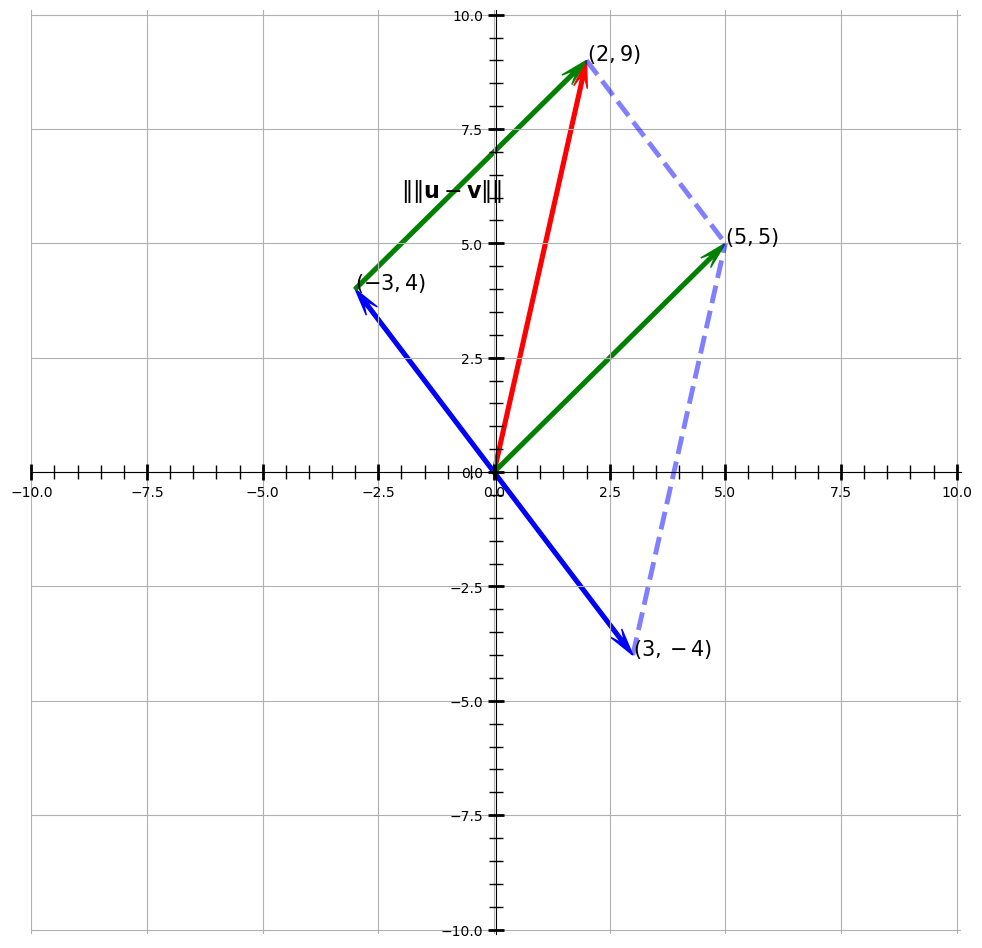

In [13]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[2, 9], [-3, 4], [3, -4], [5, 5]])
col = ['red', 'blue', 'blue', 'green']
cordt = ['$(2, 9)$', '$(-3, 4)$', '$(3, -4)$', '$(5, 5)$']

for i in range(4):
    ax.arrow(0, 0, vects[i, 0], vects[i, 1], color = col[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
ax.grid()

points = np.array([[2, 9], [5, 5], [3, -4], [-3, 4]])

ax.arrow(points[3][0], points[3][1], points[1][0], points[1][1], color = 'green', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)

line1 = np.array([points[0], points[1]])
ax.plot(line1[:,0], line1[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([points[2], points[1]])
ax.plot(line2[:,0], line2[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.text(-2, 6, '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 16)

###################### Axis, Spines, Ticks ##########################
ax.axis([-10, 10.1, -10.1, 10.1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')

从图中我们可以知道，$\|\mathbf{u}-\mathbf{v}\|$等于$\sqrt{5^2 + 5^2}$。

In [14]:
np.sqrt(5**2 + 5**2)

与```np.linalg.norm(u - v)```的结果相同。

# <font face="gotham" color="purple"> 正交向量</font>

我们有两个向量 $\mathbf{u}$ 和 $\mathbf{v}$, 求 $\|\mathbf{u}+\mathbf{v}\|$ 和 $\|\mathbf{u}-\mathbf{v}\|$ 的距离的平方



$$\begin{aligned}
\big[\operatorname{dist}(\mathbf{u},-\mathbf{v})\big]^{2} &=\|\mathbf{u}-(-\mathbf{v})\|^{2}=\|\mathbf{u}+\mathbf{v}\|^{2} \\
&=(\mathbf{u}+\mathbf{v}) \cdot(\mathbf{u}+\mathbf{v}) \\
&=\mathbf{u} \cdot(\mathbf{u}+\mathbf{v})+\mathbf{v} \cdot(\mathbf{u}+\mathbf{v}) \\
&=\mathbf{u} \cdot \mathbf{u}+\mathbf{u} \cdot \mathbf{v}+\mathbf{v} \cdot \mathbf{u}+\mathbf{v} \cdot \mathbf{v} \\
&=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}+2 \mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

$$\begin{aligned}
\big[\operatorname{dist}(\mathbf{u}, \mathbf{v})\big]^{2} &=\|\mathbf{u}\|^{2}+\|-\mathbf{v}\|^{2}+2 \mathbf{u} \cdot(-\mathbf{v}) \\
&=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-2 \mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

假设 $\mathbf{u} = (1, 4)$ 和 $\mathbf{v} = (-2, 2)$, 可视化向量和距离。


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\4069400583.py:6: SyntaxWarning: invalid escape sequence '\m'
  vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$']
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\4069400583.py:6: SyntaxWarning: invalid escape sequence '\m'
  vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$']
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\4069400583.py:6: SyntaxWarning: invalid escape sequence '\m'
  vec_name = ['$\mathbf{u}$', '$\mathbf{v}$',

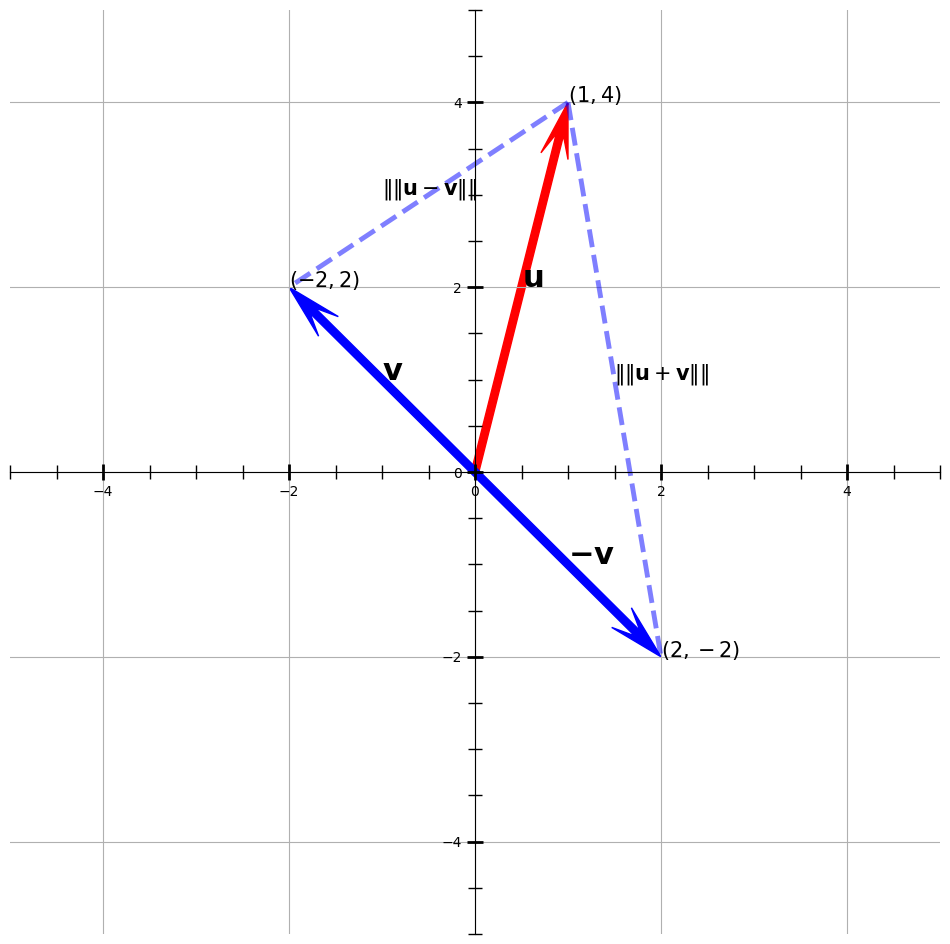

In [15]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[1, 4], [-2, 2], [2, -2]])
colr = ['red', 'blue', 'blue'] 
cordt = ['$(1, 4)$', '$(-2, 2)$', '$(2, -2)$']
vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$']

for i in range(3):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

ax.text(x = -1, y = 3, s = '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 15)    
ax.text(x = 1.5, y = 1, s = '$\|\|\mathbf{u}+\mathbf{v}\|\|$', size = 15)    



############################### Dashed Line #######################
line1 = np.array([vects[0], vects[1]])
ax.plot(line1[:,0], line1[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([vects[0], vects[2]])
ax.plot(line2[:,0], line2[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

###################### Axis, Spines, Ticks ##########################
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')

ax.axis([-5, 5, -5, 5])
ax.grid()

请注意，如果$\big[\operatorname{dist}(\mathbf{u},-\mathbf{v})\big]^{2} = \big[\operatorname{dist}(\mathbf{u}, \mathbf{v})\big]^{2}$，那么$\mathbf{u}$和$\mathbf{v}$是正交的。根据上述方程，必须有

$$\mathbf{u} \cdot \mathbf{v} = 0$$

这是线性代数中最重要的结论之一。

假设另有一个向量$w = (2.5, 2.5)$，让我们再次在图上绘制它。

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\789349921.py:6: SyntaxWarning: invalid escape sequence '\m'
  vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$', '$\mathbf{w}$']
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\789349921.py:6: SyntaxWarning: invalid escape sequence '\m'
  vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$', '$\mathbf{w}$']
C:\Users\cyy\AppData\Loc

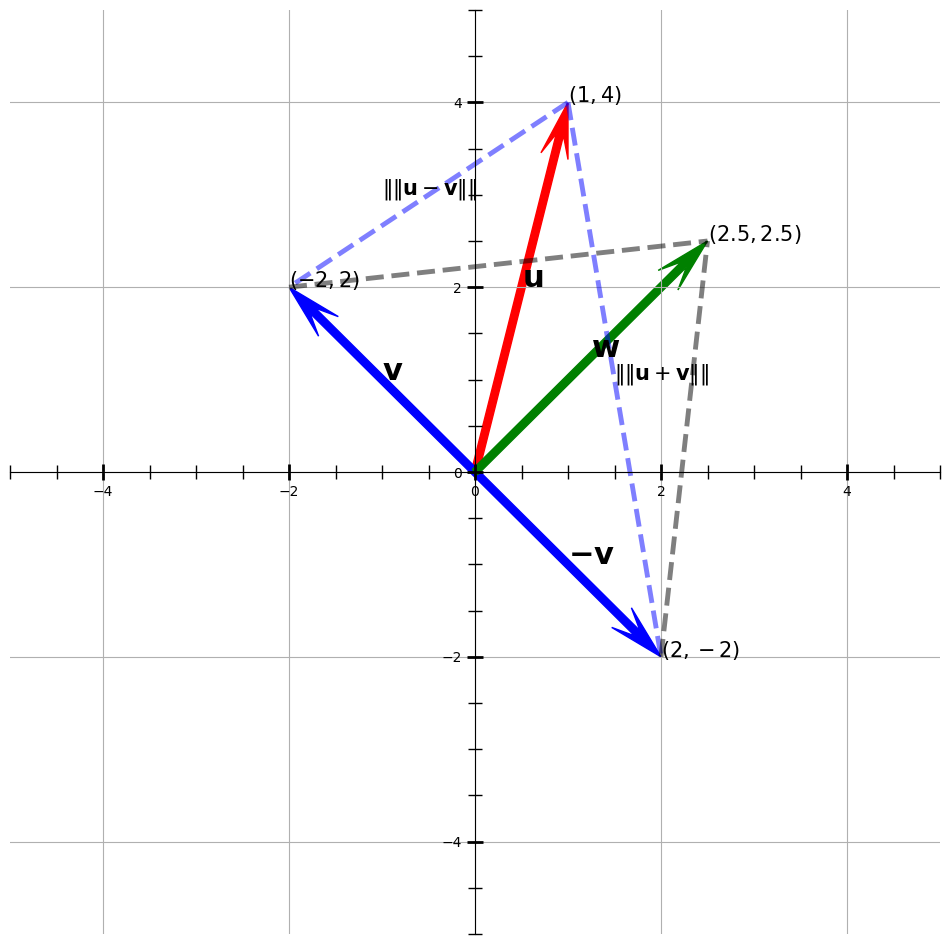

In [16]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[1, 4], [-2, 2], [2, -2], [2.5, 2.5]])
colr = ['red', 'blue', 'blue', 'green'] 
cordt = ['$(1, 4)$', '$(-2, 2)$', '$(2, -2)$', '$(2.5, 2.5)$']
vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$', '$\mathbf{w}$']

for i in range(4):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

ax.text(x = -1, y = 3, s = '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 15)    
ax.text(x = 1.5, y = 1, s = '$\|\|\mathbf{u}+\mathbf{v}\|\|$', size = 15)    

############################### Dashed Line #######################

line1 = np.array([vects[0], vects[1]])
ax.plot(line1[:,0], line1[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([vects[0], vects[2]])
ax.plot(line2[:,0], line2[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line1 = np.array([vects[1], vects[3]])
ax.plot(line1[:,0], line1[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([vects[2], vects[3]])
ax.plot(line2[:,0], line2[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')

###################### Axis, Spines, Ticks ##########################
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')

ax.axis([-5, 5, -5, 5])
ax.grid()

使用SciPy内置函数，构建两个$2\times 2$的矩阵来保存向量的头部和尾部坐标。

In [17]:
a = np.array([[1, 4], [-2, 2]])
b = np.array([[1, 4], [2, -2]])

In [18]:
distance = sp.spatial.distance.pdist(a, 'euclidean'); distance

array([3.60555128])

In [19]:
distance = sp.spatial.distance.pdist(b, 'euclidean');distance

array([6.08276253])

使用NumPy的```.norm```函数进行验证。

In [20]:
def dist(u, v):
    a = np.linalg.norm(u - v)
    return a

In [21]:
u = np.array([1, 4])
v = np.array([-2, 2])
dist(u, v)

In [22]:
u = np.array([1, 4])
v = np.array([2, -2])
dist(u, v)

现在让我们测试向量$(2.5, 2.5)^T$是否与$(2, -2)^T$和$(-2, 2)^T$垂直。

In [23]:
a = np.array([[2.5, 2.5], [-2, 2]])
b = np.array([[2.5, 2.5], [2, -2]])
distance1 = sp.spatial.distance.pdist(a, 'euclidean')
distance2 = sp.spatial.distance.pdist(b, 'euclidean')

In [24]:
print(distance1, distance2)

[4.52769257] [4.52769257]


它们长度相同，这意味着$\mathbf{w}\perp \mathbf{v}$和$\mathbf{w}\perp \mathbf{-v}$。

## <font face="gotham" color="purple"> 正交补</font>

一般来说，所有与子空间$W$正交的向量$\mathbf{z}$的集合被称为<font face="gotham" color="red">正交补</font>，或表示为$W^\perp$。

最常见的例子是

$$(\operatorname{Row} A)^{\perp}=\operatorname{Nul} A \quad \text { and } \quad(\operatorname{Col} A)^{\perp}=\operatorname{Nul} A^{T}$$

矩阵$A$的零空间与$A$的行空间正交；$A^T$的零空间与$A$的列空间正交。

# <font face="gotham" color="purple"> 在$\mathbb{R}^n$中的角度</font>

在向量空间中计算角度的一个公式，我们需要用到余弦定理：

$$\|\mathbf{u}-\mathbf{v}\|^{2}=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-2\|\mathbf{u}\|\|\mathbf{v}\| \cos \vartheta$$

重排后，我们得到

$$\begin{aligned}
\|\mathbf{u}\|\|\mathbf{v}\| \cos \vartheta &=\frac{1}{2}\left[\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-\|\mathbf{u}-\mathbf{v}\|^{2}\right] \\
&=\frac{1}{2}\left[u_{1}^{2}+u_{2}^{2}+v_{1}^{2}+v_{2}^{2}-\left(u_{1}-v_{1}\right)^{2}-\left(u_{2}-v_{2}\right)^{2}\right] \\
&=u_{1} v_{1}+u_{2} v_{2} \\
&=\mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

在统计学中，$\cos{\vartheta}$被称为<font face="gotham" color="red">相关系数</font>。

$$
\cos{\vartheta}=\frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\|\|\mathbf{v}\|}
$$

## <font face="gotham" color="purple"> 点积的几何解释</font>

你可能注意到有时候<i>点积</i>和<i>内积</i>这两个术语会互换使用。尽管如此，它们确实有不同的含义。

函数和多项式也可以有内积，但我们通常用点积来指代向量空间中的内积。

我们将展示点积具有一个有趣的几何解释。

考虑两个向量$\mathbf{a}$和$\mathbf{u}$，它们指向不同的方向，它们之间形成的角度是$\vartheta$，同时$\mathbf{u}$是一个单位向量。我们想知道$\mathbf{a}$指向$\mathbf{u}$方向的程度。

这个值可以通过将$\mathbf{a}$投影到$\mathbf{u}$上来计算。

$$
 \|\mathbf{a}\|\cos{\vartheta}=\|\mathbf{a}\| \|\mathbf{u}\|\cos{\vartheta} = \mathbf{a} \cdot\mathbf{u} 
$$

任何向量$\mathbf{b}$都可以被标准化为一个单位向量$\mathbf{u}$，然后执行上述计算，我们可以确定$\mathbf{b}$指向$\mathbf{u}$方向的程度。

# <font face="gotham" color="purple"> 正交集</font>

如果$\mathbb{R}^{n}$中的一组向量$S = \left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$ 中的任意一对向量都是正交的，即当$i \neq j$时$\mathbf{u}_{i} \cdot \mathbf{u}_{j}=0$，那么$S =\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$ 被称为<font face="gotham" color="red">正交集</font>。

自然地，正交集$S$是线性无关的，它们也是由$\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$张成的空间的<font face="gotham" color="red">正交基</font>。正交基的优势在于可以快速计算基向量的坐标。

例如，对于$W$中的任意向量$\mathbf{y}$，

$$
\mathbf{y}=c_{1} \mathbf{u}_{1}+\cdots+c_{p} \mathbf{u}_{p}
$$

因为它是一个正交集，

$$
\mathbf{y} \cdot \mathbf{u}_{1}=\left(c_{1} \mathbf{u}_{1}+c_{2} \mathbf{u}_{2}+\cdots+c_{p} \mathbf{u}_{p}\right) \cdot \mathbf{u}_{1}=c_{1}\left(\mathbf{u}_{1} \cdot \mathbf{u}_{1}\right)
$$

因此

$$c_{j}=\frac{\mathbf{y} \cdot \mathbf{u}_{j}}{\mathbf{u}_{j} \cdot \mathbf{u}_{j}} \quad(j=1, \ldots, p)$$

# <font face="gotham" color="purple">正交投影</font>

对于$\mathbb{R}^n$中的任意向量$\mathbf{y}$，我们希望将其分解为

$$
\mathbf{y} = \alpha \mathbf{u}+\mathbf{z} = \hat{\mathbf{y}}+\mathbf{z}
$$

其中$\mathbf{u}$与$\mathbf{z}$垂直，$\alpha$是一个标量。由$\mathbf{u}$张成的子空间$L$上的$\mathbf{y}$的投影表示为

$$\hat{\mathbf{y}}=\operatorname{proj}_{L} \mathbf{y}=\frac{\mathbf{y} \cdot \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} \mathbf{u}$$

因为$\mathbf{u}\perp \mathbf{z}$，所以$\mathbf{u}\cdot \mathbf{z} = 0$，将$\mathbf{z}$替换为$\mathbf{y}- \alpha \mathbf{u}$：

$$
(\mathbf{y}- \alpha \mathbf{u})\cdot \mathbf{u}= 0\\
\alpha = \frac{\mathbf{y}\cdot \mathbf{u}}{\mathbf{u}\cdot \mathbf{u}}
$$

现在我们得到了投影到由$\mathbf{u}$张成的$L$的公式。

## <font face="gotham" color="purple"> 一个在$\mathbb{R}^T$中的视觉示例</font>

假设我们有$\mathbf{y} = (2, 5)^T$，$\mathbf{u} = (3, 1)^T$。将$\hat{\mathbf{y}}$投影到由$\mathbf{u}$张成的子空间$L$上。

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\o'
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\1638507684.py:6: SyntaxWarning: invalid escape sequence '\m'
  vec_name = ['$\mathbf{y}$', '$\mathbf{u}$']
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\1638507684.py:6: SyntaxWarning: invalid escape sequence '\m'
  vec_name = ['$\mathbf{y}$', '$\mathbf{u}$']
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\1638507684.py:21: SyntaxWarning: invalid escape sequence '\o'
  ax.text(x = 6.5, y = 3, s = '$L = \operatorname{Span(\mathbf{u})}$', size = 19)


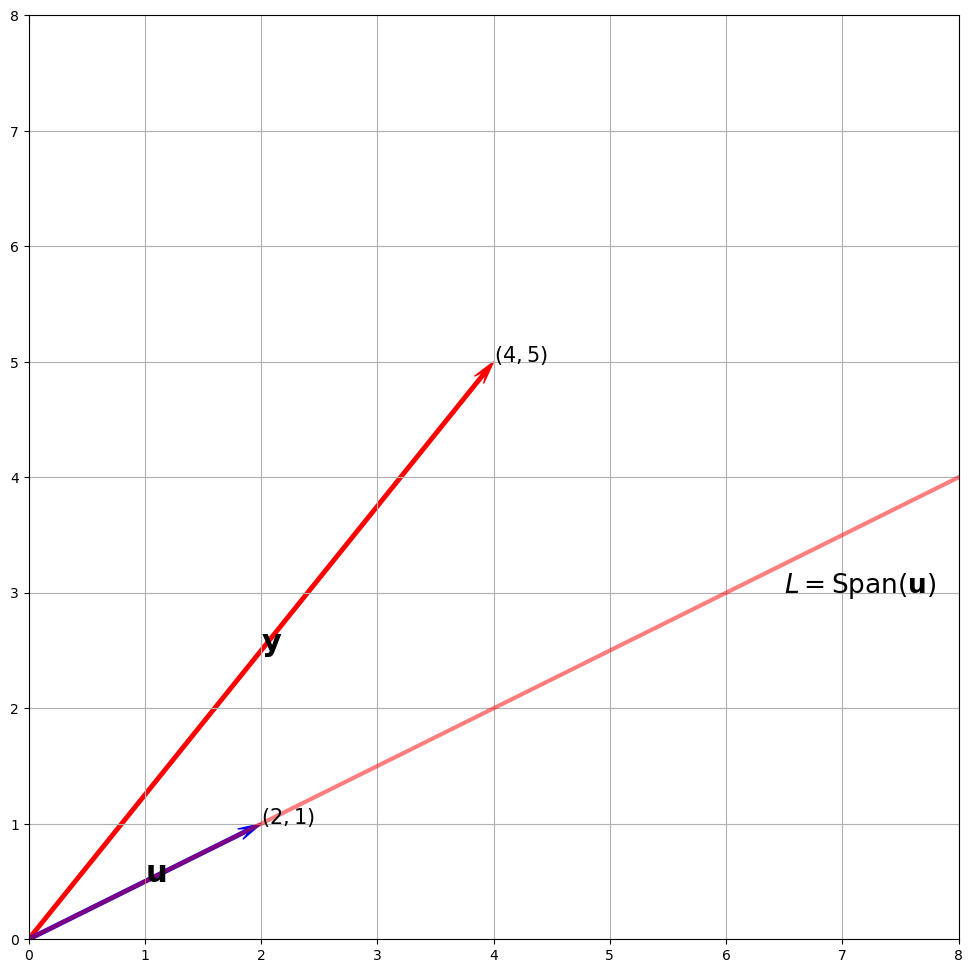

In [25]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[4, 5], [2, 1]])
colr = ['red', 'blue'] 
cordt = ['$(4, 5)$', '$(2, 1)$']
vec_name = ['$\mathbf{y}$', '$\mathbf{u}$']

for i in range(2):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .03, 
             length_includes_head = True,
             head_width = .1, # default: 3*width
             head_length = .2,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

################################### Subspace L ############################
x = np.linspace(0, 8.1)
y = 1/2*x
ax.plot(x, y, lw = 3, color = 'red', alpha = .5)
ax.text(x = 6.5, y = 3, s = '$L = \operatorname{Span(\mathbf{u})}$', size = 19)

ax.axis([0, 8, 0, 8])
ax.grid()

让我们使用公式来计算$\alpha$和$\hat{\mathbf{y}}$。

In [26]:
y = np.array([4, 5])
u = np.array([2, 1])
alpha = (y@u)/(u@u);alpha

In [27]:
yhat = alpha*u;yhat

array([5.2, 2.6])

根据上述结果，我们可以绘制出正交投影。

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\o'
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\1677987810.py:6: SyntaxWarning: invalid escape sequence '\m'
  vec_name = ['$\mathbf{y}$', '$\mathbf{u}$', r'$\hat{\mathbf{y}} = \alpha\mathbf{u}$']
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\1677987810.py:6: SyntaxWarning: invalid escape sequence '\m'
  vec_name = ['$\mathbf{y}$', '$\mathbf{u}$', r'$\hat{\mathbf{y}} = \alpha\mathbf{u}$']
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\1677987810.py:23: SyntaxWarning: invalid escape sequence '\m'
  ax.text(4.7, 3.8, '$\mathbf{z}$', size = 22)
C:\Users\cyy\AppData\Local\Temp\ipykernel_443

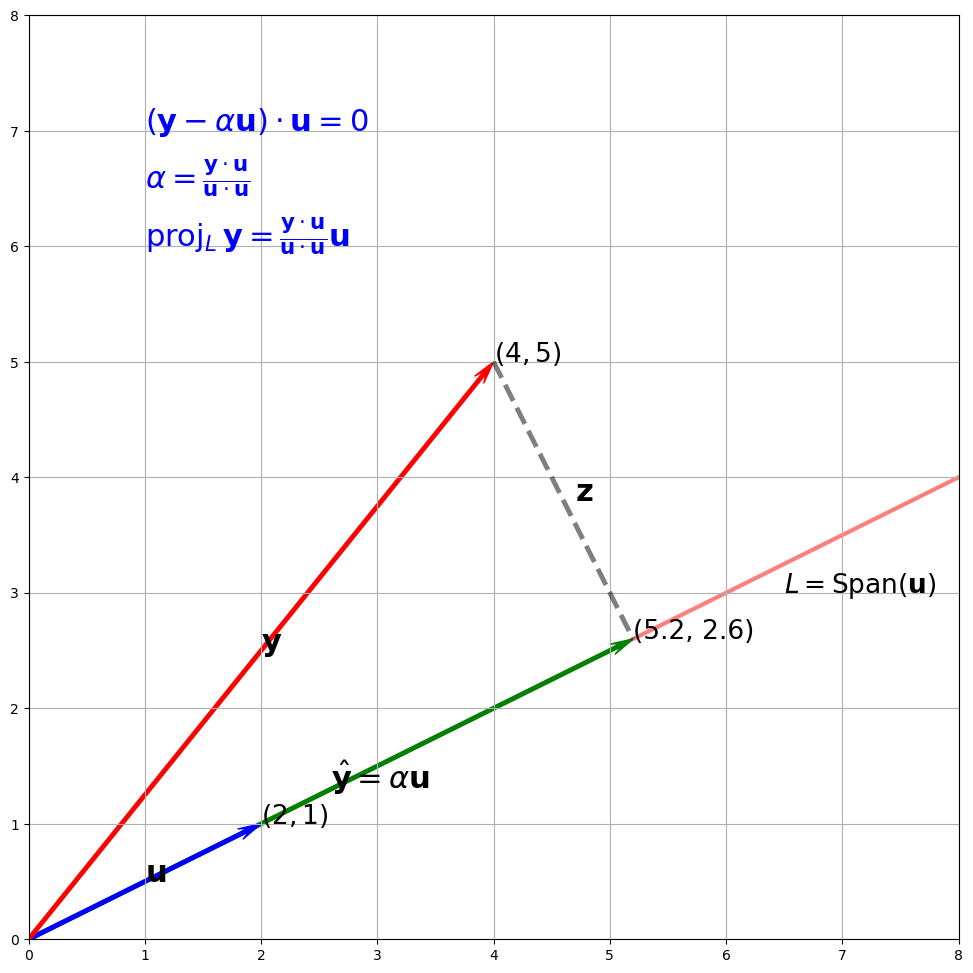

In [28]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[4, 5], [2, 1], [5.2, 2.6]])
colr = ['red', 'blue', 'green'] 
cordt = ['$(4, 5)$', '$(2, 1)$', '(5.2, 2.6)']
vec_name = ['$\mathbf{y}$', '$\mathbf{u}$', r'$\hat{\mathbf{y}} = \alpha\mathbf{u}$']

for i in range(3):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .03, 
             length_includes_head = True,
             head_width = .1, # default: 3*width
             head_length = .2,
             overhang = .4, zorder = -i)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 19)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

##################################### Components of y orthogonal to u ##########################

point1 = [4, 5]
point2 = [5.2, 2.6]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')
ax.text(4.7, 3.8, '$\mathbf{z}$', size = 22)
################################### Subspace L ############################
x = np.linspace(0, 8.1)
y = 1/2*x
ax.plot(x, y, lw = 3, color = 'red', alpha = .5, zorder = -3)
ax.text(x = 6.5, y = 3, s = '$L = \operatorname{Span(\mathbf{u})}$', size = 19)

ax.axis([0, 8, 0, 8])
ax.grid()

#################################### Formula ################################
ax.text(x = 1, y = 7, 
        s = r'$(\mathbf{y}- \alpha \mathbf{u})\cdot \mathbf{u}= 0$',
        size = 22, color = 'b')
ax.text(x = 1, y = 6.5, 
        s = r'$\alpha = \frac{\mathbf{y}\cdot \mathbf{u}}{\mathbf{u}\cdot \mathbf{u}}$',
        size = 22, color = 'b')
ax.text(x = 1, y = 6, 
        s = r'$\operatorname{proj}_{L}\mathbf{y}=\frac{\mathbf{y}\cdot\mathbf{u}}{\mathbf{u}\cdot\mathbf{u}}\mathbf{u}$',
        size = 22, color = 'b')
plt.show()

## <font face="gotham" color="purple"> 正交分解定理</font>

为了将正交投影推广到更高维度的$\mathbb{R}^n$，我们将这个思想总结为<font face="gotham" color="red">正交分解定理</font>。

设$W$是$\mathbb{R}^{n}$的一个子空间。那么$\mathbb{R}^{n}$中的每个向量$\mathbf{y}$都可以唯一地写成如下形式：
$$
\mathbf{y}=\hat{\mathbf{y}}+\mathbf{z}
$$
其中$\hat{\mathbf{y}}$在$W$中，$\mathbf{z}$在$W^{\perp}$中。事实上，如果$\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$是$W$的任意正交基，那么
$$
\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\cdots+\frac{\mathbf{y} \cdot \mathbf{u}_{p}}{\mathbf{u}_{p} \cdot \mathbf{u}_{p}} \mathbf{u}_{p}
$$
而$\mathbf{z}=\mathbf{y}-\hat{\mathbf{y}}$。

在$\mathbb{R}^{2}$中，我们将$\mathbf{y}$投影到由$\mathbf{u}$张成的子空间$L$上，这里我们将公式推广到$\mathbb{R}^{n}$，即将$\mathbf{y}$投影到由$\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$张成的$W$上。

## <font face="gotham" color="purple"> $\mathbb{R}^{3}$中的一个视觉示例</font>

一个子空间$W=\operatorname{Span}\left\{\mathbf{u}_{1}, \mathbf{u}_{2}\right\}$，以及一个向量$\mathbf{y}$不在$W$中，将$\mathbf{y}$分解为$\hat{\mathbf{y}} + \mathbf{z}$，并绘制它们。

其中

$$\mathbf{u}_{1}=\left[\begin{array}{r}
2 \\
5 \\
-1
\end{array}\right], \mathbf{u}_{2}=\left[\begin{array}{r}
-2 \\
1 \\
1
\end{array}\right], \text { and } \mathbf{y}=\left[\begin{array}{l}
1 \\
2 \\
3
\end{array}\right]$$

在$\mathbb{R}^3$中，投影到$W$上

$$
\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\frac{\mathbf{y} \cdot \mathbf{u}_{2}}{\mathbf{u}_{2} \cdot \mathbf{u}_{2}} \mathbf{u}_{2}=\hat{\mathbf{y}}_{1}+\hat{\mathbf{y}}_{2}
$$

绘图的代码相当冗长，但非常直观。

In [29]:
%matplotlib notebook

######################## Subspace W ##############################
s = np.linspace(-.5, .5, 10)
t = np.linspace(-.5, .5, 10)
S, T = np.meshgrid(s, t)

X1 = 2 * S - 2 * T
X2 = 5 * S + T
X3 = -S + T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X1, X2, X3, linewidth = 1.5, alpha = .3)

########################### vector y ###############################
y = np.array([1, 2, 3])
u1, u2 = np.array([2, 5, -1]), np.array([-2, 1, 1])

vec = np.array([[0, 0, 0, y[0], y[1], y[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

ax.text(y[0], y[1], y[2], '$\mathbf{y}$', size = 15)
########################### vector u1 and u2 ###############################

vec = np.array([[0, 0, 0, u1[0], u1[1], u1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, u2[0], u2[1], u2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(u1[0], u1[1], u1[2], '$\mathbf{u}_1$', size = 15)
ax.text(u2[0], u2[1], u2[2], '$\mathbf{u}_2$', size = 15)
###########################  yhat ###############################

alpha1 = (y@u1)/(u1@u1)
alpha2 = (y@u2)/(u2@u2)

yhat1 = alpha1*u1
yhat2 = alpha2*u2
yhat = yhat1 + yhat2

vec = np.array([[0, 0, 0, yhat1[0], yhat1[1], yhat1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3, zorder= 3)

vec = np.array([[0, 0, 0, yhat2[0], yhat2[1], yhat2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3, zorder= 3)

vec = np.array([[0, 0, 0, yhat[0], yhat[1], yhat[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'pink', alpha = 1,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3, zorder= 3)

ax.text(yhat1[0], yhat1[1], yhat1[2], '$\hat{\mathbf{y}}_1$', size = 15)
ax.text(yhat2[0], yhat2[1], yhat2[2], '$\hat{\mathbf{y}}_2$', size = 15)
ax.text(x = yhat[0], y = yhat[1], z = yhat[2], 
        s = r'$\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\frac{\mathbf{y} \cdot \mathbf{u}_{2}}{\mathbf{u}_{2} \cdot \mathbf{u}_{2}} \mathbf{u}_{2}=\hat{\mathbf{y}}_{1}+\hat{\mathbf{y}}_{2}$', size = 15)
###########################  z ###############################
z = y - yhat
vec = np.array([[yhat[0], yhat[1], yhat[2], z[0], z[1], z[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'green', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

############################ Dashed Line ####################

line1 = np.array([y, yhat1])
ax.plot(line1[:,0], line1[:,1], line1[:,2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([y, yhat2])
ax.plot(line2[:,0], line2[:,1], line2[:,2], c = 'b', lw = 2.5,alpha =0.5, ls = '--')

line3 = np.array([yhat, yhat2])
ax.plot(line3[:,0], line3[:,1], line3[:,2], c = 'b', lw = 2.5,alpha =0.5, ls = '--')

line4 = np.array([yhat, yhat1])
ax.plot(line4[:,0], line4[:,1], line4[:,2], c = 'b', lw = 2.5,alpha =0.5, ls = '--')

############################# View Angel
ax.view_init(elev=-6, azim=12)

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\h'
<>:66: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\h'
<>:66: SyntaxWarning: invalid escape sequence '\h'
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\3817871951.py:25: SyntaxWarning: invalid escape sequence '\m'
  ax.text(y[0], y[1], y[2], '$\mathbf{y}$', size = 15)
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\3817871951.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax.text(u1[0], u1[1], u1[2], '$\mathbf{u}_1$', size = 15)
C:\Users\cyy\AppData\Local\Temp\ipykernel_44336\3817871951.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax.text(u2[0], u2[1], u2[2], '$\mathbf{u}_2

<IPython.core.display.Javascript object>

# <font face="gotham" color="purple"> 正交归一集</font>

一个<font face="gotham" color="red">正交归一集</font>是通过对正交集进行归一化得到的，也被称为<font face="gotham" color="red">正交归一基</font>。

矩阵的列形成正交归一集对于矩阵计算非常重要。

设$U=\left[\begin{array}{lll}
\mathbf{u}_{1} & \mathbf{u}_{2} & \mathbf{u}_{3}
\end{array}\right]$，其中$\mathbf{u}_{i}$来自于一个正交归一集，那么外积$U^TU$是

$$U^{T} U=\left[\begin{array}{l}
\mathbf{u}_{1}^{T} \\
\mathbf{u}_{2}^{T} \\
\mathbf{u}_{3}^{T}
\end{array}\right]\left[\begin{array}{lll}
\mathbf{u}_{1} & \mathbf{u}_{2} & \mathbf{u}_{3}
\end{array}\right]=\left[\begin{array}{lll}
\mathbf{u}_{1}^{T} \mathbf{u}_{1} & \mathbf{u}_{1}^{T} \mathbf{u}_{2} & \mathbf{u}_{1}^{T} \mathbf{u}_{3} \\
\mathbf{u}_{2}^{T} \mathbf{u}_{1} & \mathbf{u}_{2}^{T} \mathbf{u}_{2} & \mathbf{u}_{2}^{T} \mathbf{u}_{3} \\
\mathbf{u}_{3}^{T} \mathbf{u}_{1} & \mathbf{u}_{3}^{T} \mathbf{u}_{2} & \mathbf{u}_{3}^{T} \mathbf{u}_{3}
\end{array}\right]$$

而且$\mathbf{u}_{i}^{T} \mathbf{u}_{j}, i, j \in (1, 2, 3)$是一个内积。

由于正交归一集的存在，我们有

$$
\mathbf{u}_{1}^{T} \mathbf{u}_{2}=\mathbf{u}_{2}^{T} \mathbf{u}_{1}=0, \quad \mathbf{u}_{1}^{T} \mathbf{u}_{3}=\mathbf{u}_{3}^{T} \mathbf{u}_{1}=0, \quad \mathbf{u}_{2}^{T} \mathbf{u}_{3}=\mathbf{u}_{3}^{T} \mathbf{u}_{2}=0\\
\mathbf{u}_{1}^{T} \mathbf{u}_{1}=1, \quad \mathbf{u}_{2}^{T} \mathbf{u}_{2}=1, \quad \mathbf{u}_{3}^{T} \mathbf{u}_{3}=1
$$

这意味着

$$
U^TU = I
$$

回顾一下我们有一个通用的投影公式

$$
\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\cdots+\frac{\mathbf{y} \cdot \mathbf{u}_{p}}{\mathbf{u}_{p} \cdot \mathbf{u}_{p}} \mathbf{u}_{p}
=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{{\mathbf{u}_{1}^T} \mathbf{u}_{1}} \mathbf{u}_{1}+\cdots+\frac{\mathbf{y} \cdot \mathbf{u}_{p}}{{\mathbf{u}_{p}^T} \mathbf{u}_{p}} \mathbf{u}_{p}\\
$$


如果$\{\mathbf{u}_1,...,\mathbf{u}_p\}$是一个正交归一集，那么

\begin{align}
\hat{\mathbf{y}}&=\left(\mathbf{y} \cdot \mathbf{u}_{1}\right) \mathbf{u}_{1}+\left(\mathbf{y} \cdot \mathbf{u}_{2}\right) \mathbf{u}_{2}+\cdots+\left(\mathbf{y} \cdot \mathbf{u}_{p}\right) \mathbf{u}_{p}\\
& = \left(\mathbf{u}_{1}^T\mathbf{y}\right) \mathbf{u}_{1}+\left(\mathbf{u}_{2}^T\mathbf{y}\right) \mathbf{u}_{2}+\cdots+\left(\mathbf{u}_{p}^T\mathbf{y}\right) \mathbf{u}_{p}\\
\end{align}

# <font face="gotham" color="purple">叉乘</font>

这是叉乘的公式：
$$
\mathbf{a} \times \mathbf{b}=\|\mathbf{a}\|\|\mathbf{b}\| \sin (\theta) \mathbf{n}
$$
叉乘的输出是向量$\mathbf{c}$的长度，它垂直于$\mathbf{a}$和$\mathbf{b}$。

In [30]:
import plotly.graph_objects as go

# Define the two vectors
a = np.array([5, 2, 3])
b = np.array([4, 8, 10])

# Calculate the cross product
c = np.cross(a, b)

# Create the 3D plot
fig = go.Figure(data=[
    go.Scatter3d(x=[0, a[0]], y=[0, a[1]], z=[0, a[2]], mode='lines', name='Vector a', line=dict(color='red', width=5)),
    go.Scatter3d(x=[0, b[0]], y=[0, b[1]], z=[0, b[2]], mode='lines', name='Vector b', line=dict(color='green', width=5)),
    go.Scatter3d(x=[0, c[0]], y=[0, c[1]], z=[0, c[2]], mode='lines', name='Vector c (cross product)', line=dict(color='blue', width=5))
])

# Set the axis labels
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Show the plot
fig.show()